In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import numpy as np
import matplotlib.pyplot as plt

from utils.ShipDataset import get_ship_dataset, load_image
from utils.Training import TrainingHelper, PlotReporter, ConsoleReporter
# when import when from import

In [8]:
train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=64, shuffle=False)
# 1.why shuffle true, which decide it?
# 2.how many batch size is suitable?

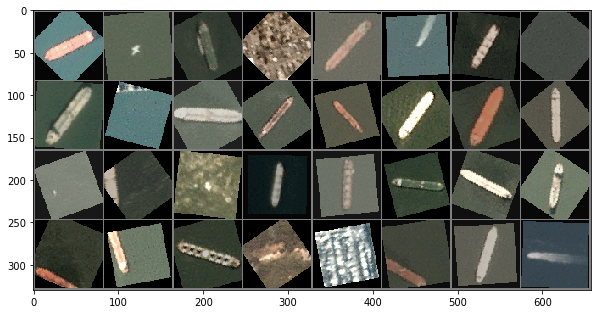

In [9]:
images, labels = next(iter(train_loader))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv2d( 3,  32, 3),
            nn.Conv2d(32,  64, 3),
            nn.Conv2d(64, 128, 3),
        ])
        self.conv_pool = nn.MaxPool2d(2, 2)
        self.avg_pool = nn.AvgPool2d(8,8)
        self.fcs = nn.ModuleList([
            nn.Conv2d(128, 1, 1)   
        ])

    def forward(self, x):
        for conv in self.convs:
            x = self.conv_pool(F.relu(conv(x)))
        x = self.avg_pool(x)
        
        for fc in self.fcs:
            x = torch.sigmoid(fc(x))
            
        return x.view(-1, 1)
        

net = Net()

In [11]:
def forward_loc(self, x):
    with torch.no_grad():
        for conv in self.convs:
            x = nn.MaxPool2d(2,2)(F.relu(conv(x)))
        x = nn.AvgPool2d(8,1)(x)

        for fc in self.fcs:
            x = torch.sigmoid(fc(x))

        return x


In [7]:
#loc_img  = torch.tensor(load_image("dataset/loc/lb_1.png"))
inputs, lables = next(iter(train_loader))
x = net.forward(inputs)
print(labels)

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])


In [7]:
training = TrainingHelper(net, nn.BCELoss(), optim.Adam(net.parameters(), lr=0.001))
training.reporter = PlotReporter(figsize=(15,5))
#training.reporter = ConsoleReporter()

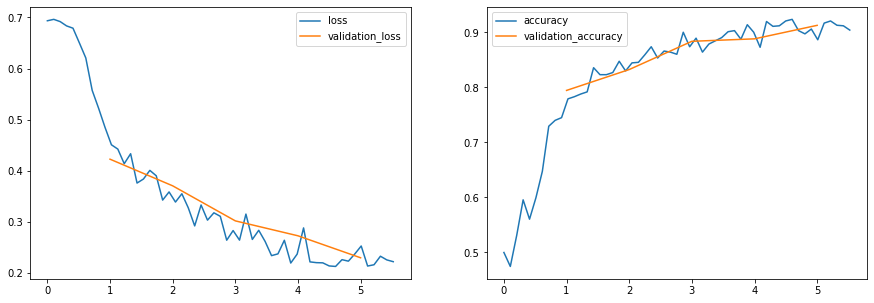

KeyboardInterrupt: 

In [8]:
training.fit(10,train_loader,valid_loader)

In [ ]:
training.fit(30,train_loader,valid_loader)

In [ ]:
import torchvision.transforms as transforms
import PIL

In [ ]:
img_loc = load_image("./dataset/loc/lb_1.png")

In [ ]:
img_loc.size

In [ ]:
img_loc = img_loc.resize((img_loc.size[0]//2, img_loc.size[1]//2), PIL.Image.BILINEAR)

In [ ]:
input_loc = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])(img_loc).unsqueeze(0)

In [ ]:
input_loc[0,0].shape

In [ ]:
heat_map = forward_loc(net, input_loc)

In [ ]:
heat_map[0].shape

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(img_loc)
plt.imshow(heat_map[0,0], cmap=plt.cm.viridis, alpha=0.6, aspect="auto", extent=(40, img_loc.size[0]-40,img_loc.size[1]-40, 40))#, interpolation='bilinear' )
#plt.colorbar()